In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/UoB physics/year 4/FYP')
from InterNetwork_grid07 import set_seed, Leg_Setup, NN_run, NN_results, Get_Num_Legs, Get_Num_Legs_Trained
from datetime import datetime
import numpy as np

from matplotlib import rc
rc("font", family="serif", size=14)
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


from neuralStellar2 import stellarGrid,NNmodel

config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)
config.gpu_options.allow_growth = True

training_track_no = [0,4,8,12,16,20]

grid_file = 'drive/My Drive/UoB physics/year 4/FYP/grid2_trun_RGB.csv'
all_df = pd.read_csv(grid_file)

solar_df = all_df[all_df['initial_MLT']==1.9]
solar_df = solar_df[solar_df['initial_Yinit']==0.28]
solar_df = solar_df[solar_df['initial_feh']==0.0]
grid1 = stellarGrid(solar_df)
grid1.popIndex(['Unnamed: 0','star_mass','star_age','star_feh','initial_Yinit','initial_MLT','luminosity', 'radius', 'effective_T','delta_nu'])
grid1.initialData()
if type(training_track_no) == list:
  df = grid1.data[grid1.data['track_no'].isin(training_track_no)]
else:
  df = grid1.data[grid1.data['track_no']==training_track_no]
grid1.data = df
df['scale_T'] = (df.Teff/5000)

df = df.sample(frac=1).reset_index(drop=True)
N = len(df.index)

Using TensorFlow backend.


Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')


In [0]:
folder_name = 'UoB physics/year 4/FYP/track_test2'
load_partially_trained_model = False
recompile = False
in_between = 10

hidden_layers = [60]*5
activation = 'elu'
mean_error_type = 'MAE'
reg = None
reg = [['l2',1e-6]]
dropout = None
decay = None
momentum = 0 

opt = ['Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','SGD']
epoch_no = [1000,500,500,10000,20000,10000,100]
lr = [0.0001,0.0002,0.0005,0.0005,0.0005,0.0005,5e-9]
batch_size = [int(N/960),int(N/240),int(N/60),int(N/10),int(N/5),int(N),int(N/120)]

leg: 1/7
epochs of leg: 1000, optimizer: Nadam, activation: elu
learning rate: 0.0001, batch size: 6, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "neuralstellar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 60)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      


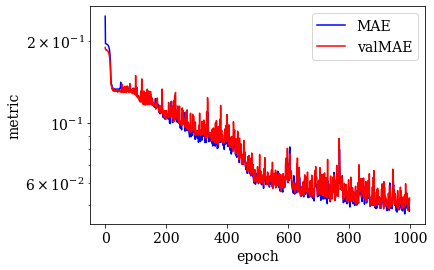

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.047867127
67018/67018 - 0s


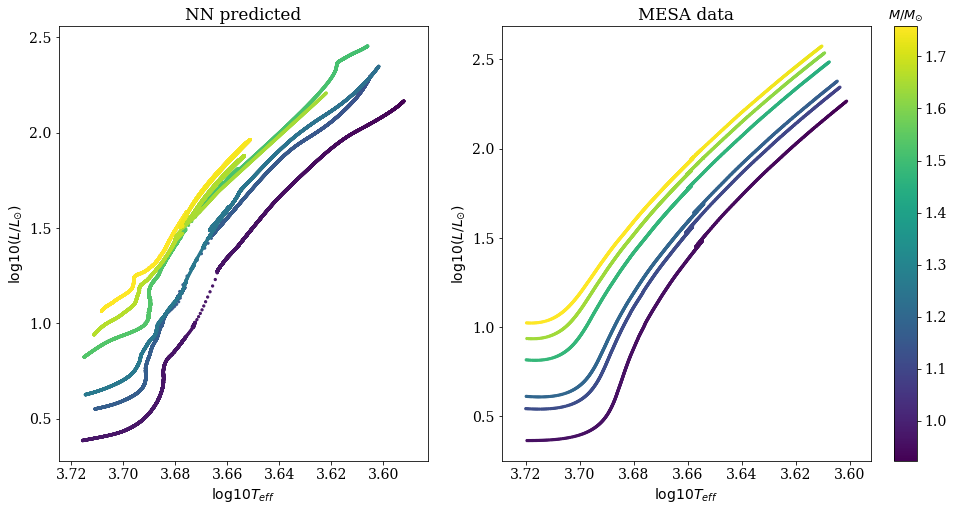

10638/10638 - 0s
968/968 - 0s


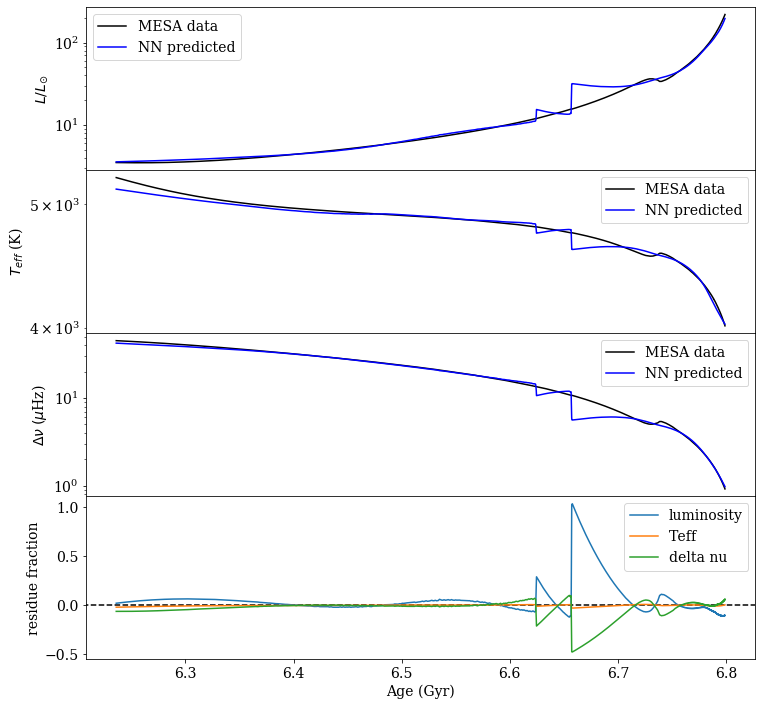

leg: 2/7
epochs of leg: 500, optimizer: Nadam, activation: elu
learning rate: 0.0002, batch size: 25, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:14:30.786760 | Time elapsed=0:06:45.049878


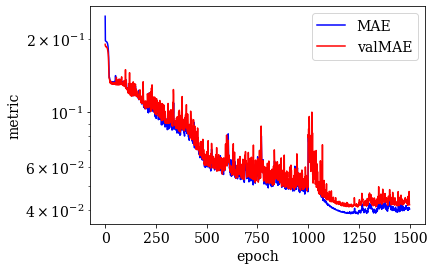

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.040226527
67018/67018 - 0s


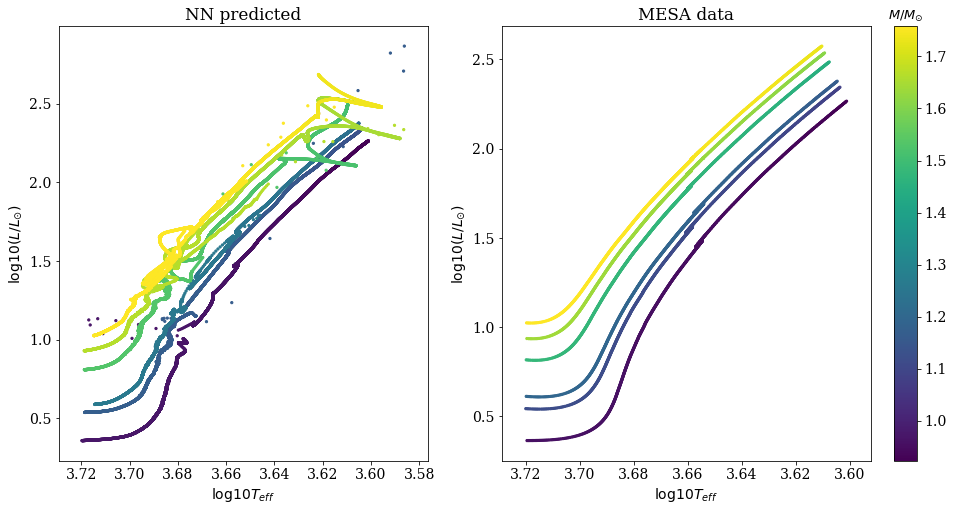

10638/10638 - 0s
968/968 - 0s


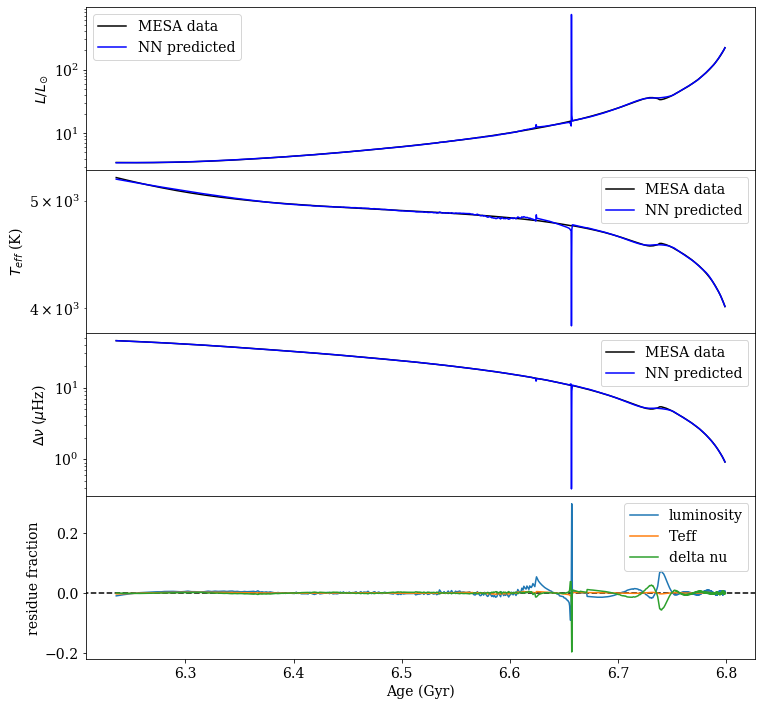

leg: 3/7
epochs of leg: 500, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 101, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:16:30.409815 | Time elapsed=0:01:47.485309


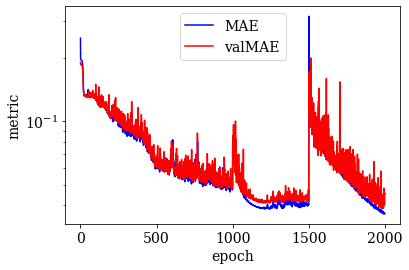

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.036512088
67018/67018 - 0s


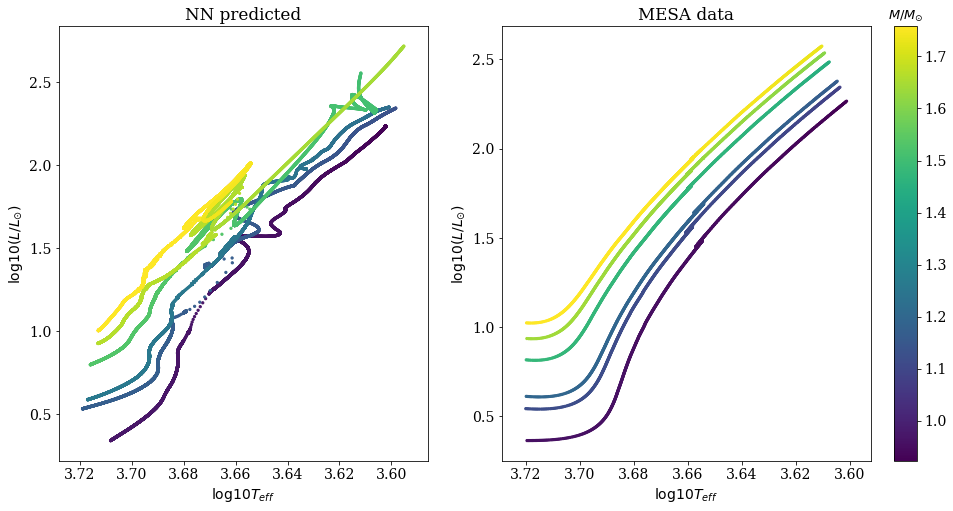

10638/10638 - 0s
968/968 - 0s


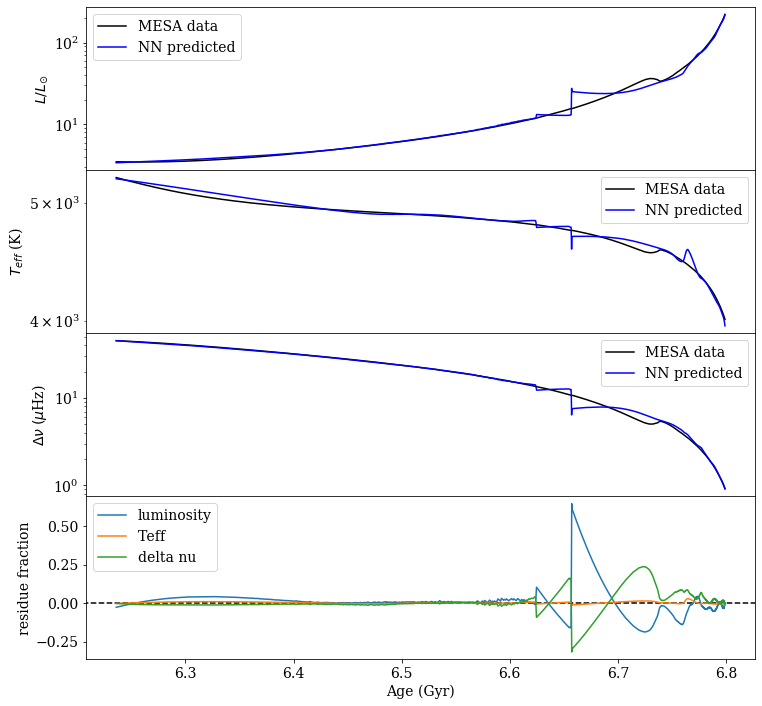

leg: 4/7
epochs of leg: 10000, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 609, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:24:48.593876 | Time elapsed=0:08:05.623279


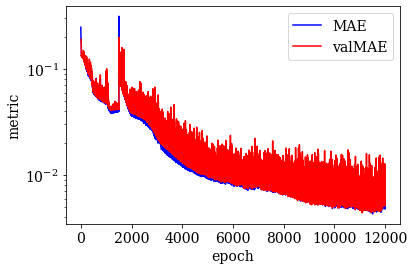

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.0072621554
67018/67018 - 0s


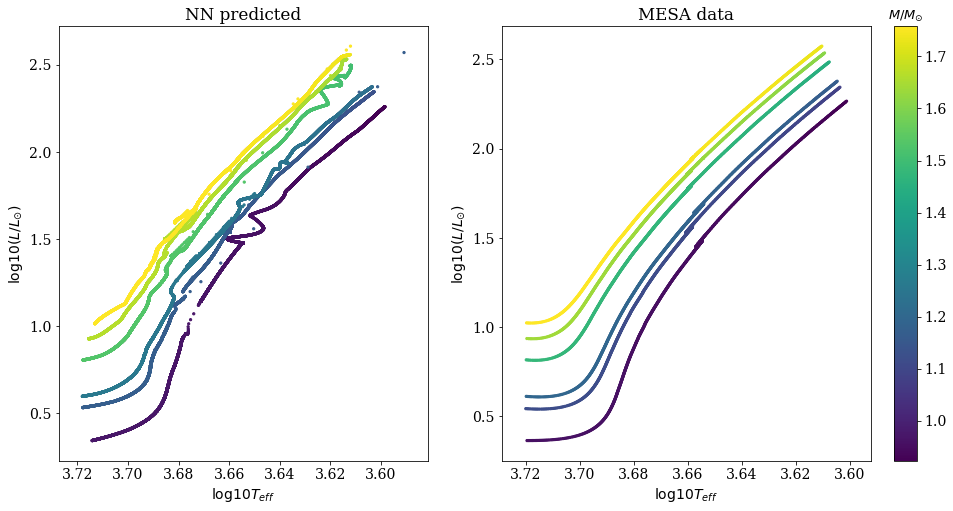

10638/10638 - 0s
968/968 - 0s


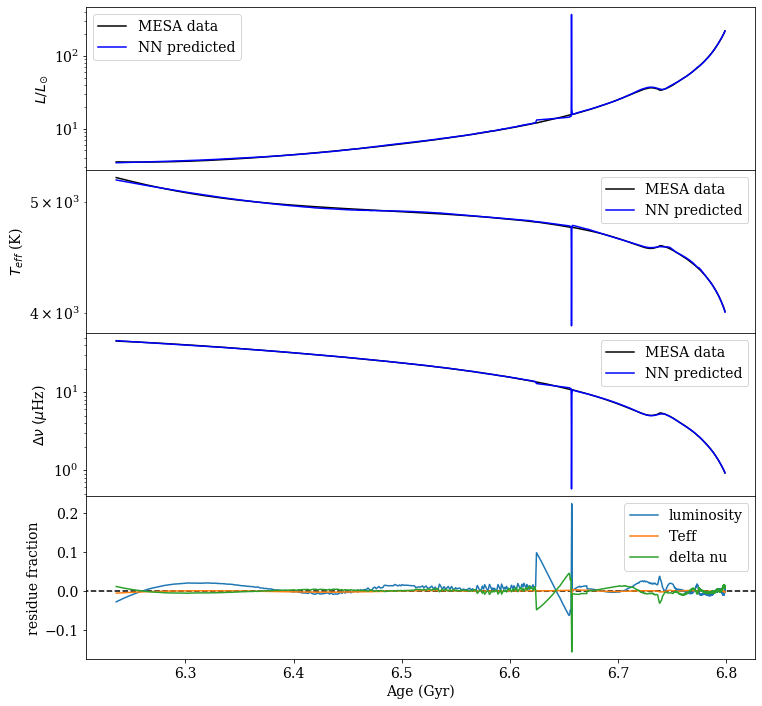

leg: 5/7
epochs of leg: 20000, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 1219, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:34:04.755435 | Time elapsed=0:09:02.841134


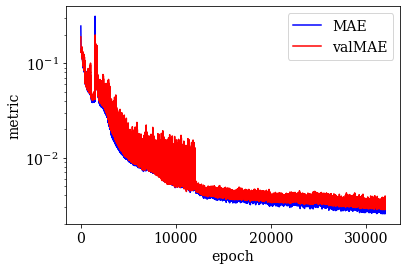

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.002919523
67018/67018 - 0s


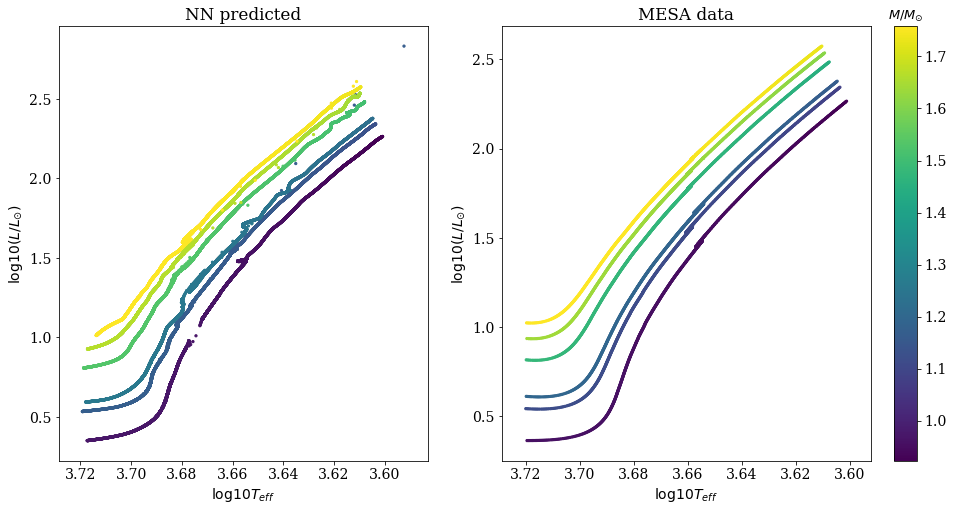

10638/10638 - 0s
968/968 - 0s


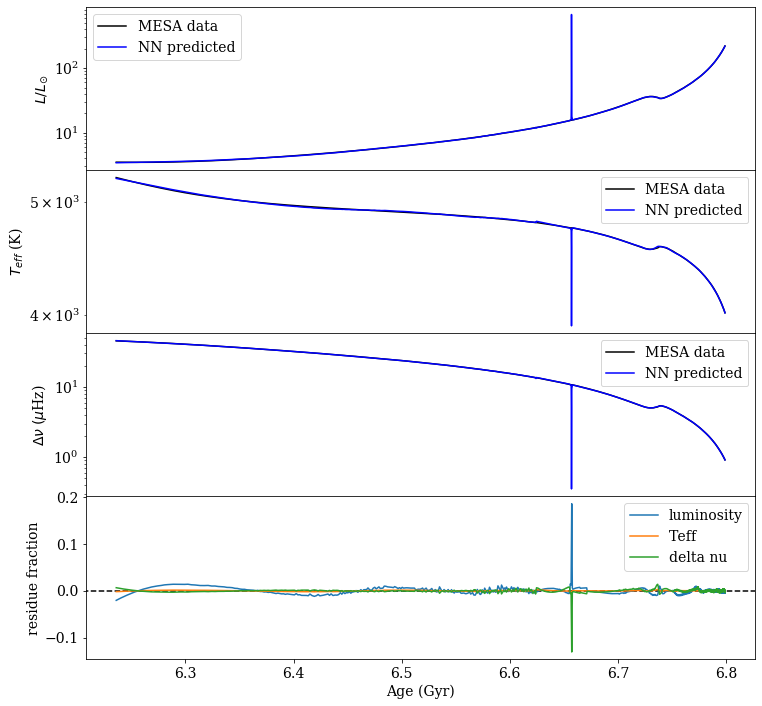

leg: 6/7
epochs of leg: 10000, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 6098, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:36:24.136580 | Time elapsed=0:02:04.664454


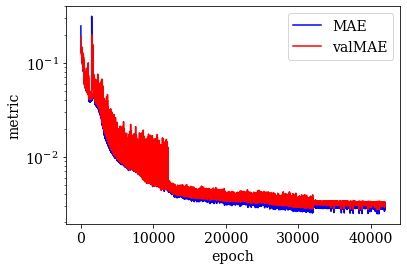

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.0029247282
67018/67018 - 0s


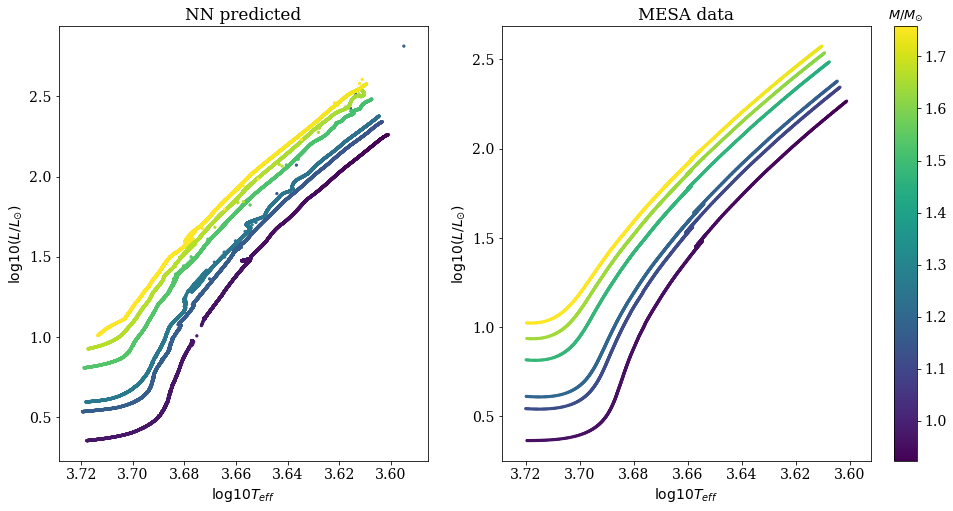

10638/10638 - 0s
968/968 - 0s


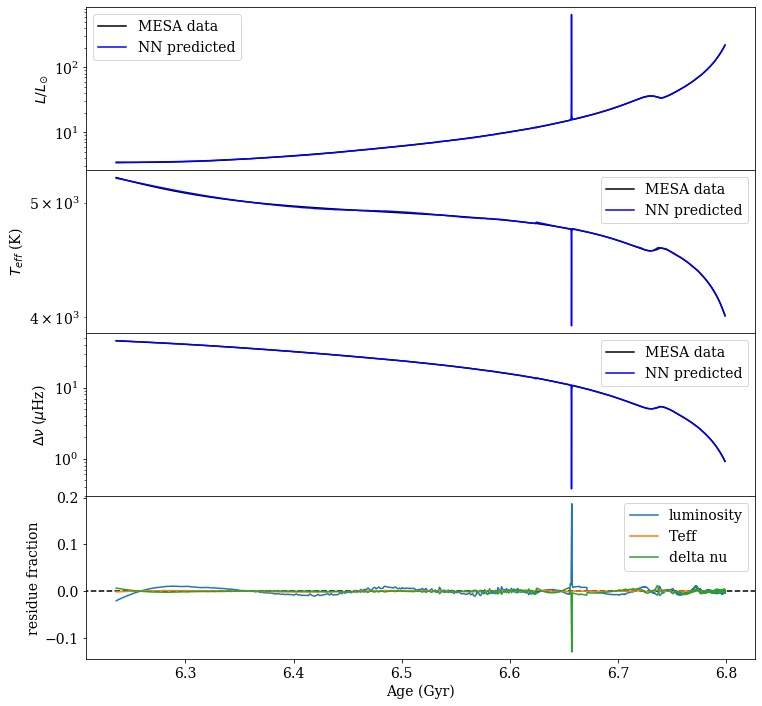

leg: 7/7
epochs of leg: 100, optimizer: SGD, activation: elu
learning rate: 5e-09, batch size: 50, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-02-27 19:37:18.644952 | Time elapsed=0:00:36.348503


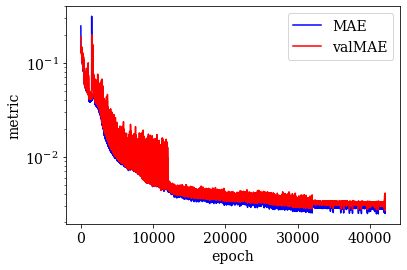

Data headers = 
Index(['step', 'evol_stage', 'initial_mass', 'Y', 'initial_feh', 'MLT', 'mass',
       'age', 'Teff', 'L', 'radius', 'feh', 'delnu', 'nu_max', 'tenfeh',
       'tenstarfeh'],
      dtype='object')
0.0025343855
6098/6098 - 0s
{'radius': 0.003090649908436621, 'Teff': 0.001414305451240964, 'delnu': 0.0029581590873022754}
evaluation results:
6098/6098 - 1s - loss: 0.0042 - mean_absolute_error: 0.0025 - mean_squared_error: 4.4761e-05
6098/6098 - 0s


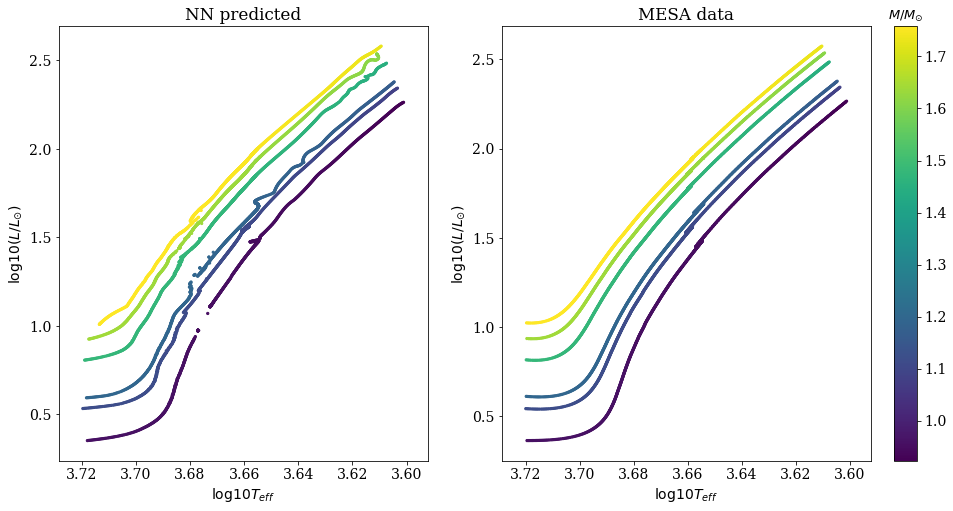

67018/67018 - 0s


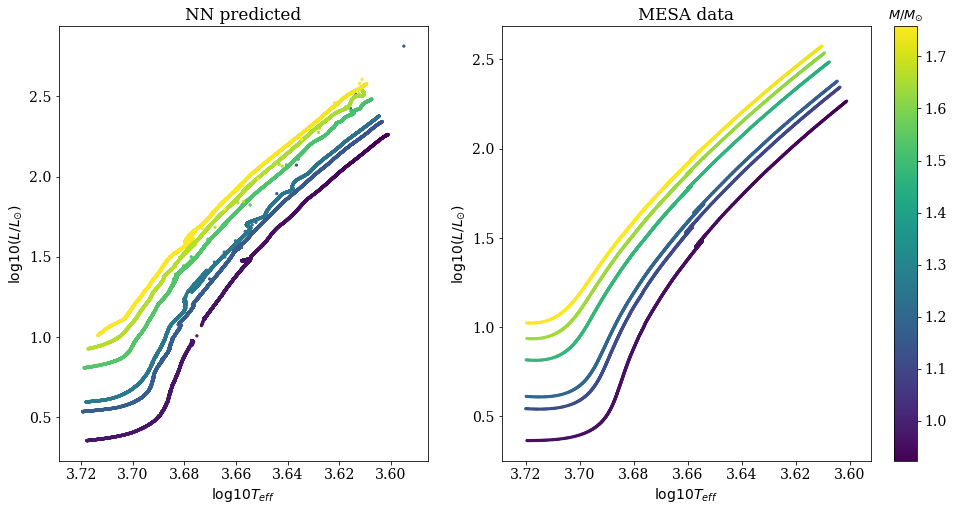

67018/67018 - 0s
6098/6098 - 0s


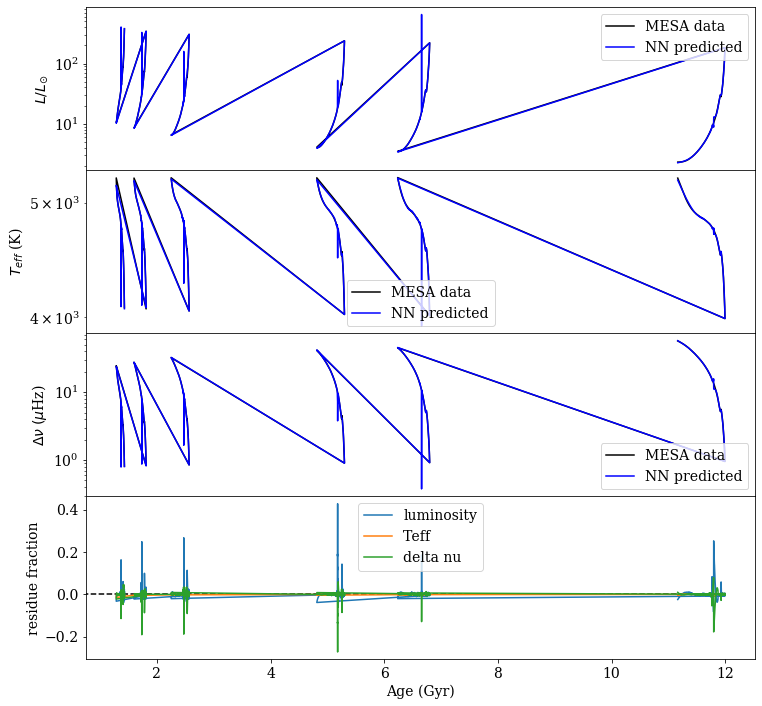

tracks: [0, 4, 8, 12, 16, 20]


In [4]:
starttime = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
legs = Leg_Setup(folder_name=folder_name,reg=reg,lr=lr,epoch_no=epoch_no,batch_size=batch_size,opt=opt,activation=activation,dropout=dropout,momentum=momentum,decay=decay,mean_error_type=mean_error_type,recompile=recompile)

NNmodel.set_seed = set_seed

for leg in range(Get_Num_Legs_Trained(folder_name=folder_name,load_partially_trained_model=load_partially_trained_model),len(legs)):
    print("leg: {}/{}\nepochs of leg: {}, optimizer: {}, activation: {}\nlearning rate: {}, batch size: {}, regularization: {}, dropout: {}, mean error type: {}".format(leg+1,len(legs),legs[leg]['epoch_no'],legs[leg]['opt'],legs[leg]['activation'],legs[leg]['lr'],legs[leg]['batch_size'],legs[leg]['reg'],legs[leg]['dropout'],legs[leg]['mean_error_type'])) 
    start_epoch, m1 = NN_run(folder_name=folder_name, df=df, hidden_layers=hidden_layers, legs=legs, leg=leg)
    if leg == len(legs)-1:
      m1 = NN_results(last_leg = True, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, training_track_no=training_track_no, in_between=in_between, radius_coeffs=None)
      print('tracks: {}'.format(training_track_no))
    else:
      m1 = NN_results(last_leg = False, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, training_track_no=training_track_no, in_between=in_between, radius_coeffs=None)

In [8]:
'''
points = solar_df
fig, ax=plt.subplots(1,1,figsize=[10,10])
ax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']),s=5,zorder=1,c='lightgrey',alpha=0.2,label='All data')
ax.scatter(np.log10(df['Teff']),np.log10(df['L']),s=10,zorder=2,c='blue',label='chosen track')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\log10(L/L_{\odot})$')
ax.legend()
plt.show()
'''

"\npoints = solar_df\nfig, ax=plt.subplots(1,1,figsize=[10,10])\nax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']),s=5,zorder=1,c='lightgrey',alpha=0.2,label='All data')\nax.scatter(np.log10(df['Teff']),np.log10(df['L']),s=10,zorder=2,c='blue',label='chosen track')\nax.set_xlim(ax.get_xlim()[::-1])\nax.set_xlabel(r'$\\log10 T_{eff}$')\nax.set_ylabel(r'$\\log10(L/L_{\\odot})$')\nax.legend()\nplt.show()\n"

In [0]:
m1=NNmodel('evo',['mass', 'age', 'feh', 'Y', 'MLT'], ['radius','Teff', 'delnu'], Teff_scaling=5000)
m1.loadHist('drive/My Drive/UoB physics/year 4/FYP/track_test2/track_test2trainHistoryDict', filetype='pickle')

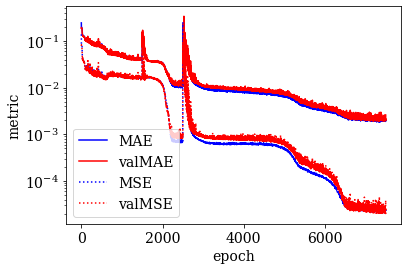

In [6]:
m1.plotHist()

In [9]:
len(m1.history['legs'])

3